In [1]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


The data set was drawn from the Boston Standard Metropolitan Statiscal Area in 1970 and the goal is to explore the data as well as produce a regression model to accurately predict the the median house value for each town.
Data sourced from https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

In [2]:
#reading in data
#need to use delim_whitespace = True as csv delimtied with spaces
house_data = pd.read_csv("data/housing.csv",delim_whitespace = True,header=None)

In [3]:
house_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
#adding in column names from kaggle info
house_data.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B 1000(Bk - 0.63)^2","LSAT","MEDV"]

In [5]:
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000(Bk - 0.63)^2,LSAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Description of each column in dataset
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per \\$10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

In [6]:
house_data.shape

(506, 14)

In [7]:
#checking for missing values
house_data.isna().sum()

CRIM                   0
ZN                     0
INDUS                  0
CHAS                   0
NOX                    0
RM                     0
AGE                    0
DIS                    0
RAD                    0
TAX                    0
PTRATIO                0
B 1000(Bk - 0.63)^2    0
LSAT                   0
MEDV                   0
dtype: int64

Appears to be no missing values within dataset

In [8]:
house_data.dtypes

CRIM                   float64
ZN                     float64
INDUS                  float64
CHAS                     int64
NOX                    float64
RM                     float64
AGE                    float64
DIS                    float64
RAD                      int64
TAX                    float64
PTRATIO                float64
B 1000(Bk - 0.63)^2    float64
LSAT                   float64
MEDV                   float64
dtype: object

Appears that all the data types in the dataframe are either int or float, however the CHAS and RAD columns are actually categorical variables so this needs to be rectified

In [9]:
#tell pandas to treat these as categorical
house_data["CHAS"] = house_data["CHAS"].astype("category")
house_data["RAD"] = house_data["RAD"].astype("category")

In [10]:
house_data.dtypes

CRIM                    float64
ZN                      float64
INDUS                   float64
CHAS                   category
NOX                     float64
RM                      float64
AGE                     float64
DIS                     float64
RAD                    category
TAX                     float64
PTRATIO                 float64
B 1000(Bk - 0.63)^2     float64
LSAT                    float64
MEDV                    float64
dtype: object

In [11]:
house_data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B 1000(Bk - 0.63)^2,LSAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


I create scatterplots and estimate the correlations between variables to get a general idea about the data.

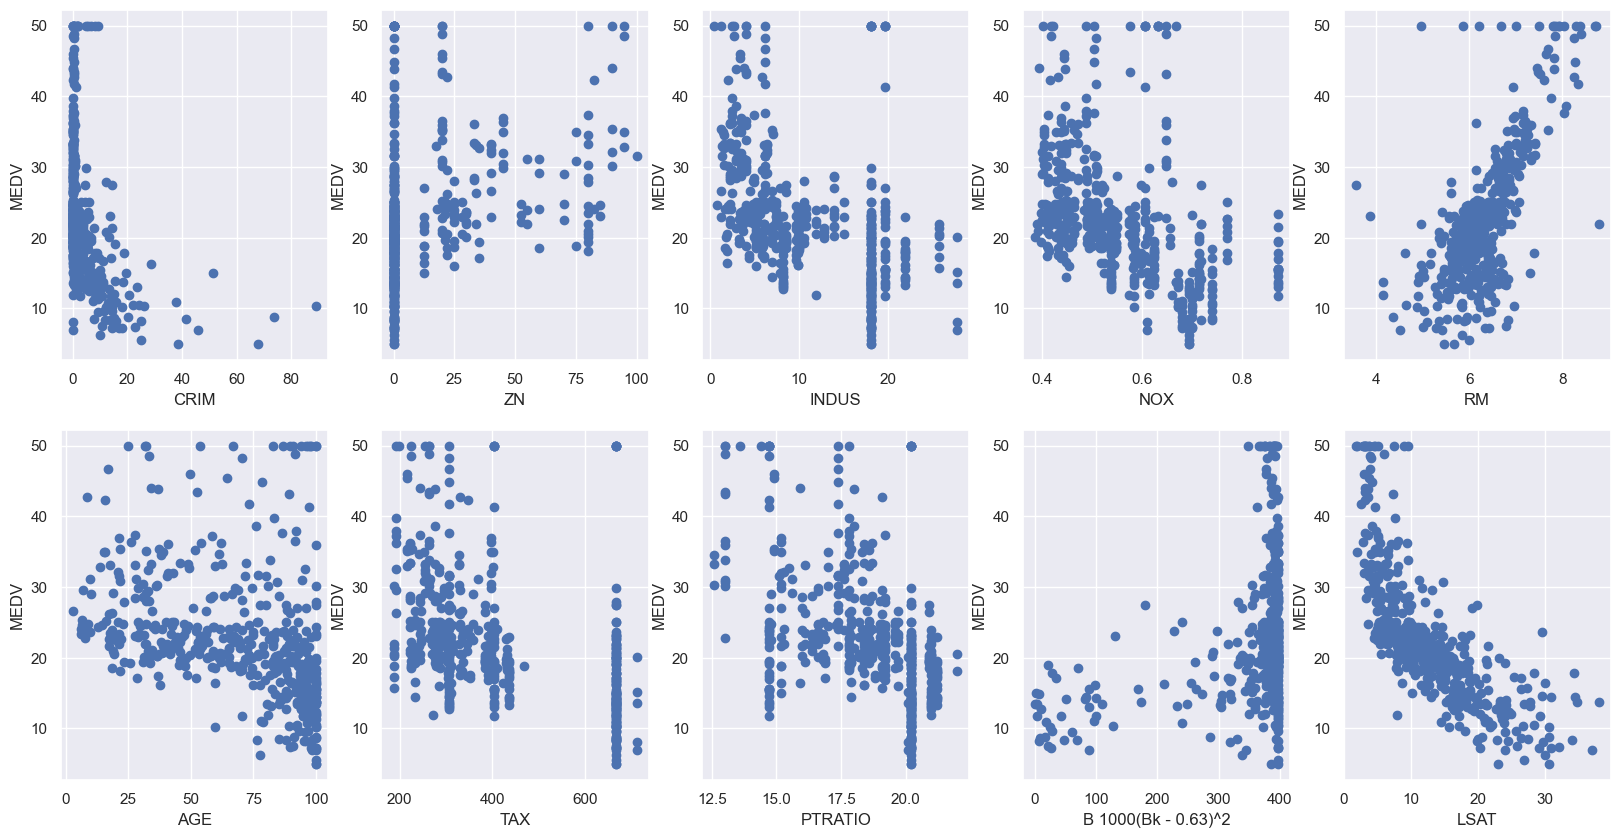

In [90]:
sns.set_theme()
x_vars=["CRIM","ZN","INDUS","NOX","RM","AGE","TAX","PTRATIO","B 1000(Bk - 0.63)^2","LSAT"]
y_plot = house_data["MEDV"]
fig, axs = plt.subplots(2,5,figsize=(20,10))
axs = axs.flatten()
for ax,x in zip(axs,x_vars):
    ax.scatter(house_data[x],y_plot)
    ax.set_xlabel(x)
    ax.set_ylabel("MEDV")


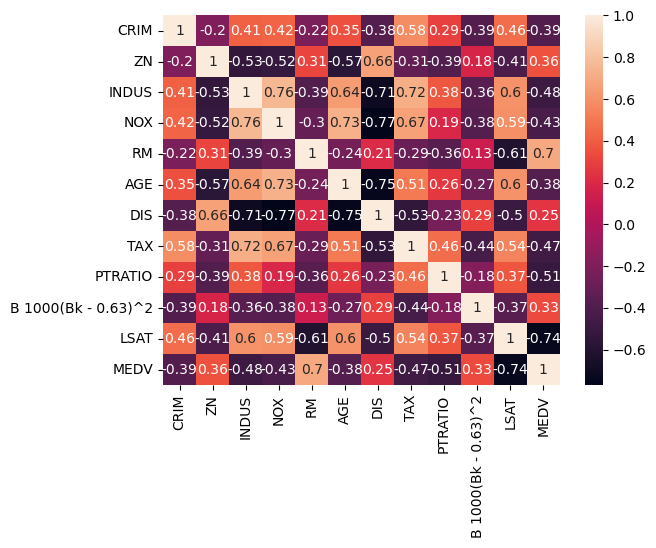

In [13]:
correlation_matrix = house_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.show()

I see that there is a strong estimated correlation between nitrous oxide amounts and industrial areas (unsurpisingly), I plot the variables to investigate further.

In [14]:
sns.set_style()

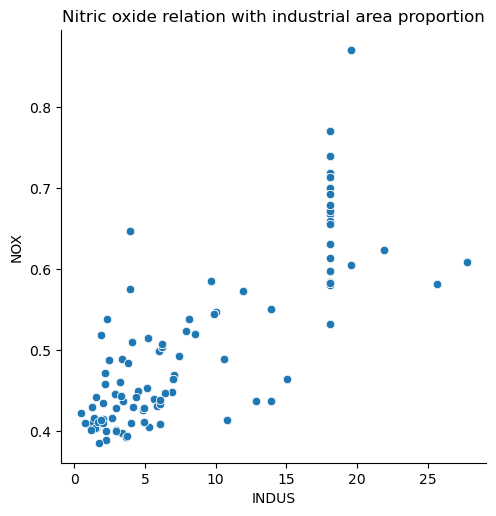

In [15]:
sns.pairplot(house_data,x_vars="INDUS",y_vars="NOX",kind='scatter',height=5)
plt.title("Nitric oxide relation with industrial area proportion")
plt.show()

Interestingly we see a straight vertical line of points which all have the exact same value of INDUS. This is surprising given that the INDUS is meant to be a continous value. I turn on grid lines and increase the x-tick resolution to determine the exact value that I am interested in.

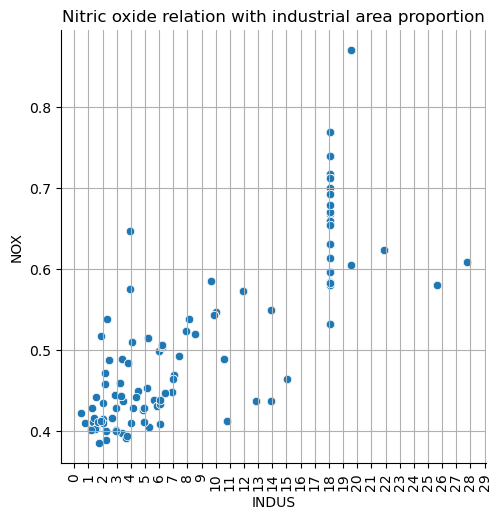

In [16]:
sns.pairplot(house_data,x_vars="INDUS",y_vars="NOX",kind='scatter',height=5)
plt.grid(visible=True)
plt.xticks(np.arange(0,30,1),rotation=90)
plt.title("Nitric oxide relation with industrial area proportion")
plt.show()

In [17]:
house_data[(house_data["INDUS"] > 17) & (house_data["INDUS"] < 19) ]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000(Bk - 0.63)^2,LSAT,MEDV
356,8.98296,0.0,18.1,1,0.770,6.212,97.4,2.1222,24,666.0,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.1,1,0.770,6.395,91.0,2.5052,24,666.0,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.1,1,0.770,6.127,83.4,2.7227,24,666.0,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.1,0,0.770,6.112,81.3,2.5091,24,666.0,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.1,0,0.770,6.398,88.0,2.5182,24,666.0,20.2,374.56,7.79,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2.81838,0.0,18.1,0,0.532,5.762,40.3,4.0983,24,666.0,20.2,392.92,10.42,21.8
484,2.37857,0.0,18.1,0,0.583,5.871,41.9,3.7240,24,666.0,20.2,370.73,13.34,20.6
485,3.67367,0.0,18.1,0,0.583,6.312,51.9,3.9917,24,666.0,20.2,388.62,10.58,21.2
486,5.69175,0.0,18.1,0,0.583,6.114,79.8,3.5459,24,666.0,20.2,392.68,14.98,19.1


In [18]:
house_data["INDUS"].unique().shape

(76,)

After checking the number of unique values in the INDUS column and find that the number of unique values is actually much less than the total number of observations, I conclude that it is likely that the INDUS measure used is likely to be used on areas grouped together and not calculated on a per area basis.

I am also interested in the approximate distribution of the median house values for each area, I get a rough idea of this through plotting a histogram of the MEDV column.

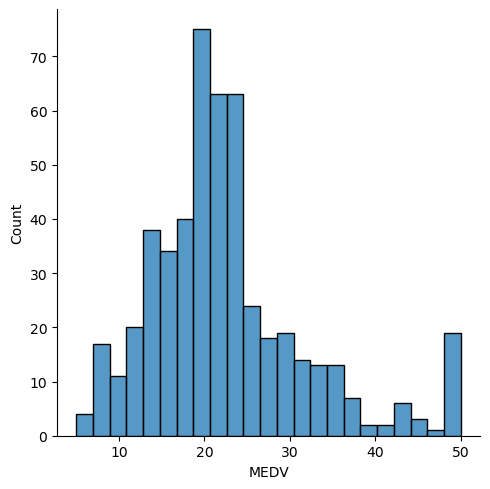

In [19]:
sns.displot(data=house_data,x="MEDV",kind='hist')
plt.show()

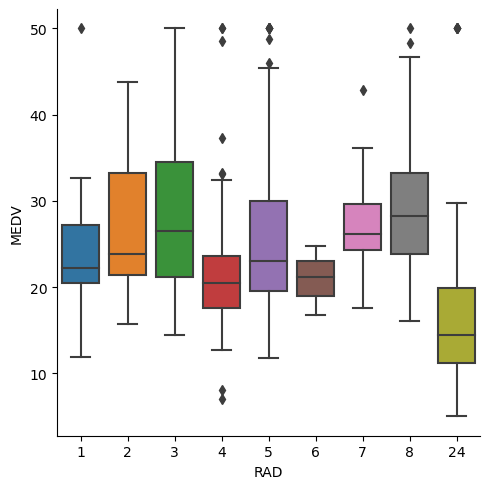

In [20]:
sns.catplot(data=house_data, x="RAD",y="MEDV",kind="box")
plt.show()

The boxplot displays that the median value for MEDV for different accesibility levels to radial highways seems to not make an extremely large difference except for RAD value of 24 which seems to be notiecbly lower. Perhaps the buyers are relatively more indifferent between RAD values of 1-8 but find areas with accessibility values of 24 to be too inaccesible, or there is some correlation with some other variable that areas with radial highway accesibility 24 that is causing this discrepancy.

To investigate this further I subset the data to select only rows with RAD = 24 and compare summary statistics with the full data set.

In [21]:
subset_rad24 = house_data[house_data["RAD"]==24]
subset_rad24.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B 1000(Bk - 0.63)^2,LSAT,MEDV
count,132.000000,132.0,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.0,1.320000e+02,132.000000,132.000000,132.000000
mean,12.759291,0.0,1.810000e+01,0.672417,6.022152,89.805303,2.061254,666.0,2.020000e+01,288.089167,18.600606,16.403788
std,13.041169,0.0,4.636122e-14,0.061004,0.718449,12.625809,0.617901,0.0,1.426499e-14,145.860431,6.905296,8.539745
min,2.378570,0.0,1.810000e+01,0.532000,3.561000,40.300000,1.129600,666.0,2.020000e+01,0.320000,2.960000,5.000000
25%,5.686307,0.0,1.810000e+01,0.614000,5.713000,85.925000,1.589250,666.0,2.020000e+01,167.375000,14.175000,11.225000
50%,9.084990,0.0,1.810000e+01,0.693000,6.176000,94.400000,1.943400,666.0,2.020000e+01,373.740000,17.910000,14.400000
75%,14.333700,0.0,1.810000e+01,0.713000,6.419000,98.825000,2.431300,666.0,2.020000e+01,395.292500,23.045000,19.900000
max,88.976200,0.0,1.810000e+01,0.770000,8.780000,100.000000,4.098300,666.0,2.020000e+01,396.900000,37.970000,50.000000


In [22]:
house_data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B 1000(Bk - 0.63)^2,LSAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


Based purely on summary statistics, the variables that appear to have a significant difference in mean between the 2 groups is CRIM (crime rate) and INDUS (proportion of industrial area). Our regression heatmap suggests both these variables might cause median house value to be lower. 

To get a crude idea of how crime rate/industrial area proportion ,radial highway access interact and median value interact with each other I generate some plots.

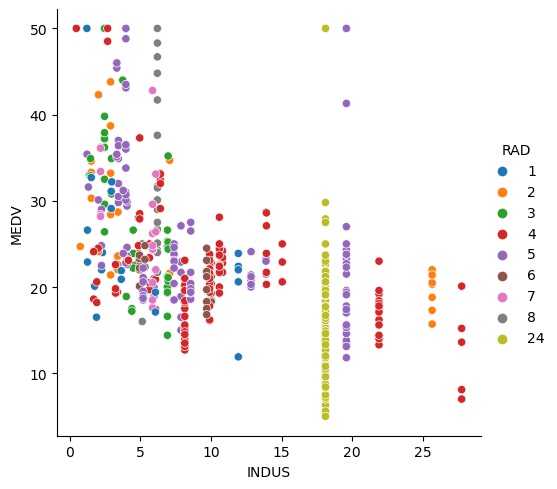

In [23]:
sns.relplot(data=house_data,x="INDUS",y="MEDV",hue="RAD")
plt.show()

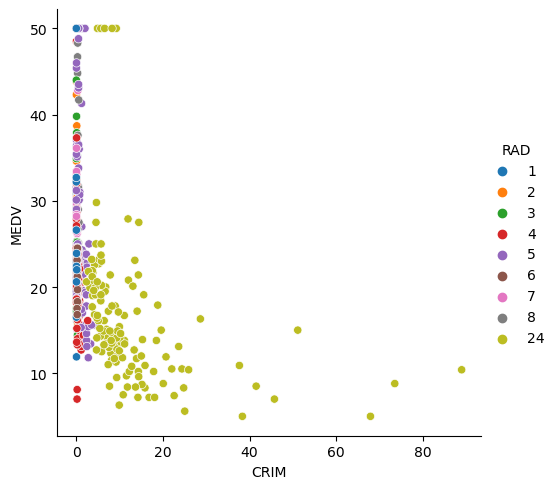

In [24]:
sns.relplot(data=house_data,x="CRIM",y="MEDV",hue="RAD")
plt.show()

The plots above imply that it is likely that the high criminal rates and large amounts of industrial areas that are resulting in lower median house prices as opposed to bad radial highway access causing lowered median house prices as we can see that there are areas with similar or worse industrial area proportions but with better radial highway access having similarly lower median house prices.

# Linear Regression

I first fit a multiple linear regression model using ordinary least squares. Because RAD is a categorical variable with multiple values, I create dummy variables to represent this information. I use the drop_first = True argument to attempt to reduce multicolinearity when introducing dummy variables


In [25]:
dummies = pd.get_dummies(house_data['RAD'],prefix="RAD",drop_first=True)
dummies.head()
MEDV = house_data["MEDV"]
house_data_dummies = house_data.drop(["MEDV","RAD"],axis=1)
house_data_dummies = pd.concat([house_data_dummies,dummies,MEDV],axis=1)
house_data_dummies.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSAT,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,4.98,0,0,0,0,0,0,0,0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,9.14,1,0,0,0,0,0,0,0,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,4.03,1,0,0,0,0,0,0,0,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,2.94,0,1,0,0,0,0,0,0,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,5.33,0,1,0,0,0,0,0,0,36.2


# RE-DO with all the dummy variables

In [26]:
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [27]:

pred_vars = house_data_dummies.iloc[:,0:20]
target_var = house_data_dummies.iloc[:,20]
X_train, X_test, y_train, y_test = train_test_split(pred_vars,target_var, train_size = 0.8,random_state = 123)
ols_model = LinearRegression()
ols_model.fit(X_train,y_train)

LinearRegression()

In [28]:
y_train_pred = ols_model.predict(X_train)
y_pred = ols_model.predict(X_test)
ols_mse_train = mean_squared_error(y_train,y_train_pred)
ols_mse_test = mean_squared_error(y_test,y_pred)
print("The training root mean squared error is {:.4f}".format(np.sqrt(ols_mse_train)))
print("The test root mean squared error is {:.4f}".format(np.sqrt(ols_mse_test)))

The training root mean squared error is 4.4435
The test root mean squared error is 5.3277


I get the a test set RMSE of around 5.3277 which is not too bad considering the mean value of the median house value in this dataset is around 22. I also see that the training RMSE is not significantly smaller than the test RMSE so I believe that the model is not overfitted to training data

Judging by the individual scatterplots of the variables against the median house value, I suspect that there may exist some non-linearity in some variables such as ZN(proportion of residential land zoned for lots over 25,000 sq.ft), so I introduce an additional polynomial term $ (ZN)^2 $

In [29]:
X_train["ZN2"] = np.square(X_train["ZN"])
X_test["ZN2"] = np.square(X_test["ZN"])


In [30]:
ols_model2 = LinearRegression()
ols_model2.fit(X_train,y_train)
y_pred2 = ols_model2.predict(X_test)
ols2_mse = mean_squared_error(y_test,y_pred2)
print("The root mean squared erorr is : {:.4f}".format(np.sqrt(ols2_mse)))

The root mean squared erorr is : 5.3158


We see a slight, but neglible improvement RMSE with the introduction of this term. I think that the increase to model complexity is unlikely to be worth including this term.

I proceed to use LASSO regression to help me perform feature selection on the my dataset. I first check for multicolinearity before fitting by checking the variance inflation factor for each variable.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
# create copy of house_data dataframe to only have explanatory variables to measure VIF
house_data_explanatory = house_data_dummies.copy()
house_data_explanatory = house_data_explanatory.drop("MEDV",axis=1)
for i in range(len(house_data_explanatory.columns)):
    print(house_data_explanatory.columns[i],":",variance_inflation_factor(house_data_explanatory,i))

CRIM : 2.1163413257247288
ZN : 3.0687869536460353
INDUS : 15.893001701129835
CHAS : 1.180898871260278
NOX : 85.17016524724724
RM : 89.8750188273353
AGE : 21.90150243218973
DIS : 15.453980092513238
TAX : 66.81384245985524
PTRATIO : 103.2329677992351
B 1000(Bk - 0.63)^2 : 20.455891159446015
LSAT : 11.430422055845689
RAD_2 : 2.2579191945353796
RAD_3 : 2.938337620479724
RAD_4 : 6.863196259853312
RAD_5 : 7.1000218223913265
RAD_6 : 2.4246672638543125
RAD_7 : 1.8960544909965737
RAD_8 : 2.3952460399210316
RAD_24 : 18.964650073026235


I notice that some variables have relatively high values of VIF computed indicating that some degree of multicolinearity exists within the varaibles, I attempt to rectify this by removing some highly correlated variables.

In [33]:
house_data_explanatory = house_data_explanatory.drop(["NOX","PTRATIO"], axis = 1)
for i in range(len(house_data_explanatory.columns)):
    print(house_data_explanatory.columns[i],":",variance_inflation_factor(house_data_explanatory,i))

CRIM : 2.114376278782969
ZN : 2.6401447520579624
INDUS : 14.388450283031087
CHAS : 1.164533201193361
RM : 55.29157943528174
AGE : 20.447590531387743
DIS : 12.855948413956426
TAX : 63.49845928583067
B 1000(Bk - 0.63)^2 : 18.987245608579173
LSAT : 9.789322157311071
RAD_2 : 2.2444158398252867
RAD_3 : 2.8627930376438218
RAD_4 : 6.512182120391997
RAD_5 : 6.810443362992489
RAD_6 : 2.398936445638243
RAD_7 : 1.8810279187449392
RAD_8 : 2.3890594371545073
RAD_24 : 18.757749443713173


I remove the NOX and PTRATIO variables as they are estimated to have correlations with many of the other variables from the correlation heatmap. I then recompute the VIF values and notice that TAX and RM seem to still have high VIF values so I remove TAX to attempt to rectify this

In [34]:
house_data_explanatory = house_data_explanatory.drop("TAX", axis = 1)
for i in range(len(house_data_explanatory.columns)):
    print(house_data_explanatory.columns[i],":",variance_inflation_factor(house_data_explanatory,i))

CRIM : 2.1143750131090333
ZN : 2.5940440324667575
INDUS : 10.6237790700566
CHAS : 1.1468190162676495
RM : 50.63243457056402
AGE : 20.271301491882358
DIS : 12.492090504628925
B 1000(Bk - 0.63)^2 : 18.894145224255897
LSAT : 9.64148293164521
RAD_2 : 2.22207359687787
RAD_3 : 2.8621297841831113
RAD_4 : 6.409134097279506
RAD_5 : 6.657675111393328
RAD_6 : 2.2372310481001954
RAD_7 : 1.8692560969063288
RAD_8 : 2.365004147348053
RAD_24 : 10.044039464912945


I first use sklearn's built in LassoCV class to help me perform cross validation to choose a good value of alpha for the LASSO regression.

In [35]:
from sklearn.linear_model import LassoCV
#selecting subset of variables that were removed to treat multicolinearity
#grabbing all the columns in house_data_explanatory 
house_data_sub = pd.DataFrame()
for colname in house_data_explanatory.columns:
    house_data_sub[colname] = house_data_explanatory[colname]
CV = LassoCV(cv=5,random_state = 423)
CV.fit(house_data_sub,house_data["MEDV"])



LassoCV(cv=5, random_state=423)

In [36]:
cv_alpha = CV.alpha_
print(cv_alpha)

0.396094010735076


Cross validation finds that the 0.396094010735076 is the best value of alpha given the parameters.

In [37]:
#creating testing,training set with multicolinearity causing variables removed.
from sklearn.linear_model import Lasso
Xl_train, Xl_test, yl_train,yl_test = train_test_split(house_data_sub,house_data["MEDV"],train_size=0.8,random_state=123)
RegLasso = Lasso(alpha=cv_alpha,fit_intercept=True)
RegLasso.fit(Xl_train,yl_train)
yl_pred = RegLasso.predict(Xl_test)
lasso_mse = mean_squared_error(yl_test,yl_pred)
print("The root mean squared erorr is : {:.3f}".format(np.sqrt(lasso_mse)))

The root mean squared erorr is : 5.816


I find that the RMSE from using LASSO to perform feature selection has actually increased compared to just fitting a regular OLS model with no feature selection. I use cross validation to get a better idea of the true performance of each model.

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
ols_cv_score = cross_val_score(ols_model,pred_vars,target_var,scoring='neg_root_mean_squared_error',cv=5)
lasso_cv_score = cross_val_score(RegLasso,house_data_sub,house_data["MEDV"],scoring="neg_root_mean_squared_error",cv=5)
print("Mean RMSE for OLS was: {:.4f}".format(-ols_cv_score.mean()))
print("Mean RMSE for LASSO was: {:.4f}".format(-lasso_cv_score.mean()))

Mean RMSE for OLS was: 5.8958
Mean RMSE for LASSO was: 5.9458


After comparing the mean RMSE computed from cross validation, we see that the the 2 models performance is very similar, I prefer the LASSO model as it is easier to interpret while having very similar predictive ability.

In [42]:
RegLasso.coef_

array([-9.06152194e-02,  6.23717501e-02, -1.27156771e-01,  0.00000000e+00,
        3.84250784e+00, -2.78792430e-03, -1.18330736e+00,  6.69347634e-03,
       -6.57403659e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00])

In [43]:
RegLasso.intercept_

9.999251158588178

The model that was fitted using LASSO is as follows:

$ MEDV = -0.0906CRIM + 0.0624ZN - 0.127INDUS + 3.84RM - 0.00279AGE - 1.18DIS + 0.00669 B\;1000(Bk-0.63)^2 - 0.657LSAT + 10.0 $

The LASSO fit seems to have shrunk all the RAD (radial highway accessibility) dummy variables to 0 as well as CHAS (Charleston River) dummy variable.

We can crudely interpret this regression model as implying that the RM, DIS and LSAT are the largest contributors towards the Median house value within an area in Boston as the relative magnitudes of these predictor variables are relatively similar. 
RM (avg number of rooms per dwelling) having a large posiive coeficient is relatively expected behaviour considering the fact generally, larger homes tend to have more rooms as well as larger homes being generally more expensive than an equivalent smaller home, so it would make sense that areas generally having more rooms would have a greater median house value on average.

DIS ( weighted distances to five Boston employment centres)  having a negative coefficient value seems to also concur with intuitvely how distance from employment centres would affect median prices, demand for homes in areas that are closer to emplyoment centers would intuitively be greater than that of homes in further areas, a negative coefficient implies that the model believes that areas being a greater distance away from the employment centres causes the median home value for that area to be lower.

The last major contributor: LSAT (% lower status of the population) is slightly more difficult to interpret, at first glance one might just assume that because of the large negative coefficient of LSAT, areas having larger low status population (proportion of adult population without high school education and proportion of adult male population classed as labrorers) is causing the areas to have lower median house prices, it could also be the case that large amounts of low status population are not directly causing the lower median house prices but instead tend to have lower incomes and as a result many live in areas with low median house values. Because of the fact that the regression methods used to produce this model give no information on causality, it is not possible to use the model to determine which of the 2 previously mentioned theories is more correct as the negative coefficient agrees with both of them.

Overall, I think that if given a dataset with a greater number of observations, it would be more practical to use a more complex model, however because of the relatively small size of the dataset ($n \approx 500$) regression models with too many features would not be suitable.